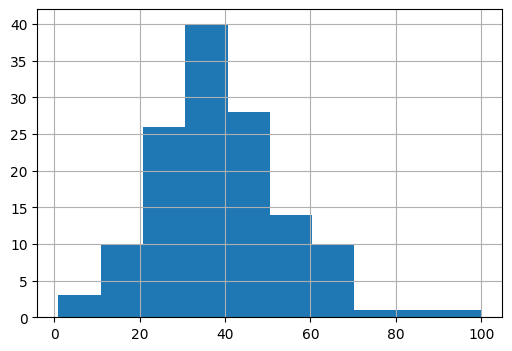

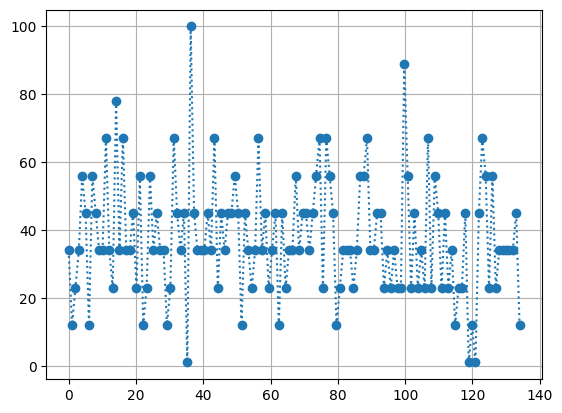

Середнє масиву :
37.776119402985074
Оригінальний масив : [ 34.  12.  23.  34.  56.  45.  12.  56.  45.  34.  34.  67.  34.  23.
  78.  34.  67.  34.  34.  45.  23.  56.  12.  23.  56.  34.  45.  34.
  34.  12.  23.  67.  45.  34.  45.   1. 100.  45.  34.  34.  34.  45.
  34.  67.  23.  45.  34.  45.  45.  56.  45.  12.  45.  34.  23.  34.
  67.  34.  45.  23.  34.  45.  12.  45.  23.  34.  34.  56.  34.  45.
  45.  34.  45.  56.  67.  23.  67.  56.  45.  12.  23.  34.  34.  34.
  23.  34.  56.  56.  67.  34.  34.  45.  45.  23.  34.  23.  34.  23.
  23.  89.  56.  23.  45.  23.  34.  23.  67.  23.  56.  45.  23.  45.
  23.  34.  12.  23.  23.  45.   1.  12.   1.  45.  67.  56.  23.  56.
  23.  34.  34.  34.  34.  34.  45.  12.]
Медіана : 34.0
Мода:  34.0
Дисперсія: 296.36778792604116
Середньоквадратичне відхилення: 17.2153358354126

Середнє значення:  37.776119402985074
Медіана:  34.0
Мода:  34.0
Дисперсія:  298.59611715856806
Середньоквадратичне відхилення:  17.27993394543417


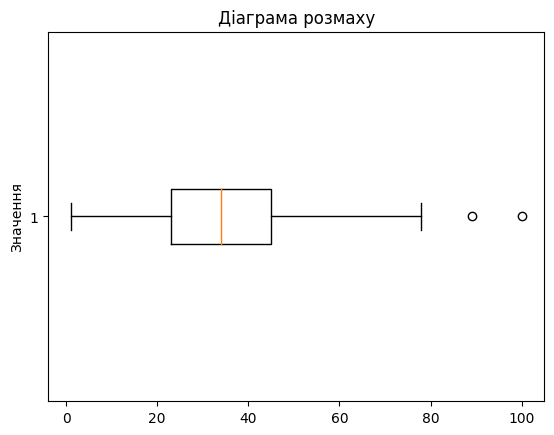

Діаграма Паретто


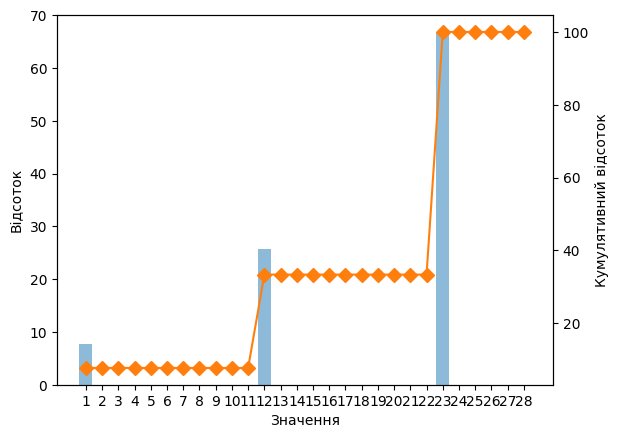

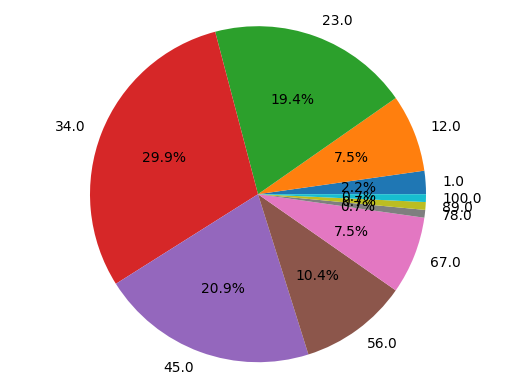

Двосторонній довірчий інтервал:  34.834537924450956 <= μ <= 40.71770088151919
Односторонній довірчий інтервал:  Верхня межа: μ <= 40.23946885985133  Нижня межа: 35.31276994611882 <= μ


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import t

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

randomArray = np.random.normal(0,1,117)*1.2
randomArray = randomArray - min(randomArray)
arrayInt = randomArray.astype(int)
array = ((arrayInt - arrayInt.min()) / (arrayInt.max() - arrayInt.min())) * (100 - 1) + 1

ax.hist(array, color='green')
ax.grid()
plt.show()
x=np.linspace(0,117,117)
plt.plot(x, array, ':o', color='green')
plt.grid()
plt.show()

sumArray = sum(array)

average = sumArray/len(array)
print("Середнє масиву :")
print(average)


print("Оригінальний масив : " + str(array))

array.sort()
n = len(array)
if n % 2 == 0:
    median = (array[n//2 - 1] + array[n//2]) / 2
else:
    median = array[n//2]
print("Медіана : " + str(median))


vals,counts = np.unique(array, return_counts=True)
index = np.argmax(counts)
print("Мода: ", vals[index])


mean = sum(array) / len(array)

squaredDifferences = sum([(x - mean)**2 for x in array])

variance = squaredDifferences / len(array)


standardDeviation = variance**0.5

print("Дисперсія:", variance)
print("Середньоквадратичне відхилення:", standardDeviation)

print("")
print("Середнє значення: ", statistics.mean(array))
print("Медіана: ", statistics.median(array))
print("Мода: ", statistics.mode(array))
print("Дисперсія: ", statistics.variance(array))
print("Середньоквадратичне відхилення: ", statistics.stdev(array))


fig, ax = plt.subplots()
ax.boxplot(array, vert=False)
ax.set_ylabel('Значення')
ax.set_title('Діаграма розмаху')
plt.show()


print("Діаграма Паретто")
counts, bins = np.histogram(array, bins=range(1, 30))
percentages = counts / sum(counts) * 100

cum_perc = np.cumsum(percentages)

fig, ax1 = plt.subplots()

ax1.bar(bins[:-1], percentages, align='center', alpha=0.5, color='green')
ax1.set_xlabel('Значення')
ax1.set_ylabel('Відсоток')

ax2 = ax1.twinx()
ax2.plot(bins[:-1], cum_perc, color='C1', marker='D', ms=7)
ax2.set_ylabel('Кумулятивний відсоток')

ax1.set_xticks(bins[:-1])
ax1.set_xticklabels(bins[:-1])
plt.show()

unique_values = np.unique(array)

sizes = [np.count_nonzero(array == value) for value in unique_values]  # Частота кожного значення без повторень
labels = list(unique_values)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')


plt.axis('equal')  # Рівні пропорції по осі x та y
plt.show()


confidence = 0.95 # персентиль (від 0 до 1)
percentile = np.abs(t.ppf((1-confidence)/2,n-1))
leftBorder = average -percentile*standardDeviation/(np.sqrt(n))
rightBorder = average+percentile*standardDeviation/(np.sqrt(n))

print("Двосторонній довірчий інтервал: ", leftBorder, "<= μ <=", rightBorder)